In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

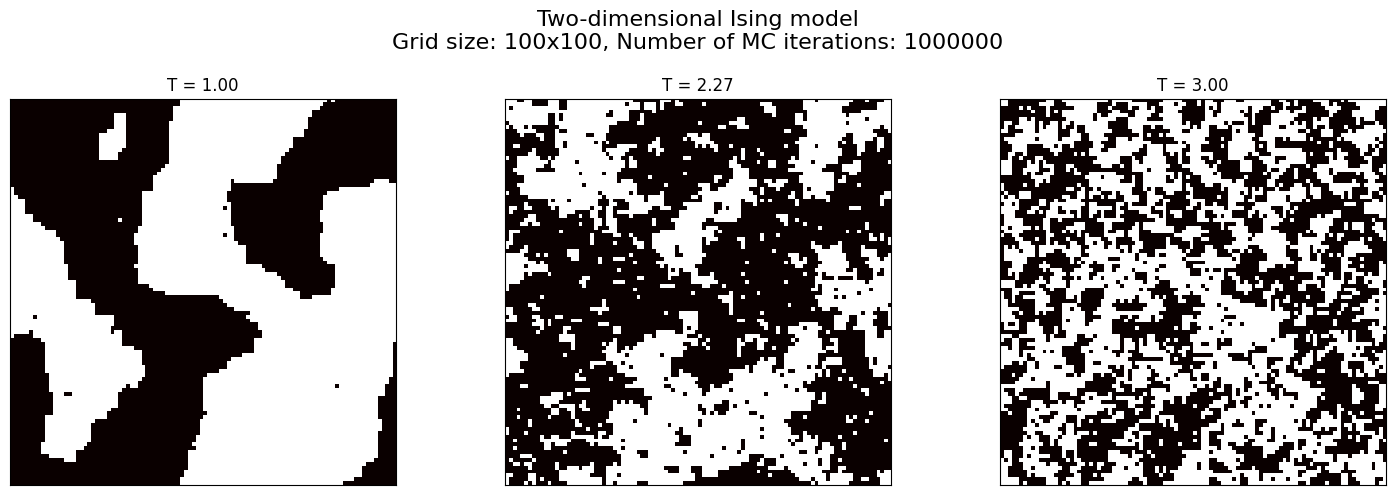

In [2]:
def initialize_spin_configuration(size):
    return np.random.choice([-1, 1], size=(size, size))

def calculate_energy(spin_config):
    energy = 0
    for i in range(len(spin_config)):
        for j in range(len(spin_config)):
            energy -= spin_config[i, j] * (spin_config[(i+1)%len(spin_config), j] +
                                            spin_config[i, (j+1)%len(spin_config)])
    return energy

def metropolis(spin_config, temperature):
    i, j = np.random.randint(0, len(spin_config), 2)
    spin_flip_energy = 2 * spin_config[i, j] * (
        spin_config[(i+1)%len(spin_config), j] +
        spin_config[i, (j+1)%len(spin_config)] +
        spin_config[(i-1)%len(spin_config), j] +
        spin_config[i, (j-1)%len(spin_config)]
    )
    if spin_flip_energy < 0 or np.random.rand() < np.exp(-spin_flip_energy / temperature):
        spin_config[i, j] *= -1

def monte_carlo(spin_config, temperature, num_steps):
    for _ in range(num_steps):
        metropolis(spin_config, temperature)

def plot_configuration(spin_config, ax, title):
    ax.imshow(spin_config, cmap='hot', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

# params
size = 100
num_steps = 1000000
temperatures = [1.0, 2.27, 3.0]  # below, at, and above critical temperature 

# init figure
fig, axes = plt.subplots(1, len(temperatures), figsize=(15, 5))

# run simulations and plot configurations
for temp, ax in zip(temperatures, axes):
    spin_config = initialize_spin_configuration(size)
    monte_carlo(spin_config, temp, num_steps)
    plot_configuration(spin_config, ax, f'T = {temp:.2f}')

fig.suptitle(f'Two-dimensional Ising model\nGrid size: {size}x{size}, Number of MC iterations: {num_steps}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Temperature: 1.00, Iteration: 0
Temperature: 1.00, Iteration: 100000
Temperature: 2.27, Iteration: 0
Temperature: 2.27, Iteration: 100000
Temperature: 3.00, Iteration: 0
Temperature: 3.00, Iteration: 100000
Temperature: 1.00, Iteration: 0
Temperature: 1.00, Iteration: 100000
Temperature: 1.00, Iteration: 200000
Temperature: 2.27, Iteration: 0
Temperature: 2.27, Iteration: 100000
Temperature: 2.27, Iteration: 200000
Temperature: 3.00, Iteration: 0
Temperature: 3.00, Iteration: 100000
Temperature: 3.00, Iteration: 200000
Temperature: 1.00, Iteration: 0
Temperature: 1.00, Iteration: 100000
Temperature: 1.00, Iteration: 200000
Temperature: 1.00, Iteration: 300000
Temperature: 2.27, Iteration: 0
Temperature: 2.27, Iteration: 100000
Temperature: 2.27, Iteration: 200000
Temperature: 2.27, Iteration: 300000
Temperature: 3.00, Iteration: 0
Temperature: 3.00, Iteration: 100000
Temperature: 3.00, Iteration: 200000
Temperature: 3.00, Iteration: 300000
Temperature: 1.00, Iteration: 0
Temperature: 1

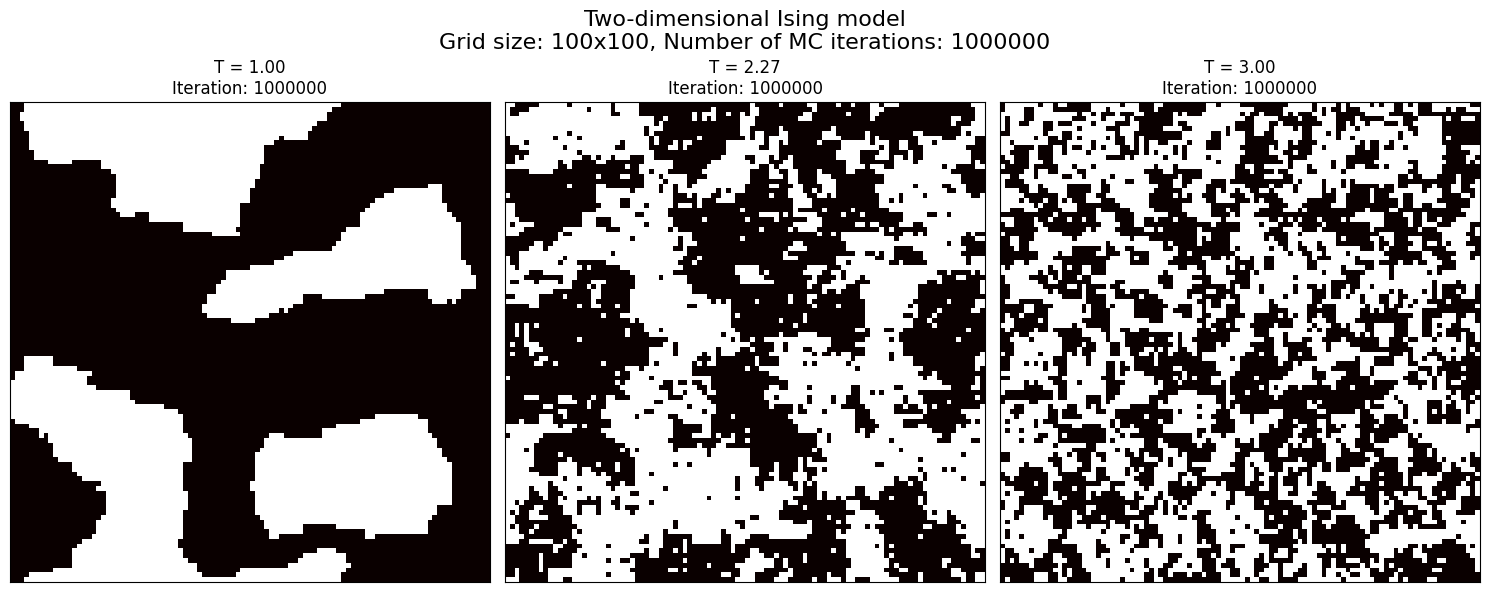

In [3]:
def initialize_spin_configuration(size):
    return np.random.choice([-1, 1], size=(size, size))

def calculate_energy(spin_config):
    energy = 0
    for i in range(len(spin_config)):
        for j in range(len(spin_config)):
            energy -= spin_config[i, j] * (spin_config[(i+1)%len(spin_config), j] +
                                            spin_config[i, (j+1)%len(spin_config)])
    return energy

def metropolis(spin_config, temperature):
    i, j = np.random.randint(0, len(spin_config), 2)
    spin_flip_energy = 2 * spin_config[i, j] * (
        spin_config[(i+1)%len(spin_config), j] +
        spin_config[i, (j+1)%len(spin_config)] +
        spin_config[(i-1)%len(spin_config), j] +
        spin_config[i, (j-1)%len(spin_config)]
    )
    if spin_flip_energy < 0 or np.random.rand() < np.exp(-spin_flip_energy / temperature):
        spin_config[i, j] *= -1

def monte_carlo(spin_config, temperature, num_steps, iteration_callback=None):
    for i in range(num_steps):
        metropolis(spin_config, temperature)
        if iteration_callback and i % 100000 == 0:  # Print every X iterations
            iteration_callback(temperature, i)

def plot_configuration(spin_config, ax, title, iteration):
    ax.imshow(spin_config, cmap='hot', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{title}\nIteration: {iteration}')

# params
size = 100
num_steps = 1000000
temperatures = [1.0, 2.27, 3.0]  # below, at, and above critical temperature

# init figure
fig, axes = plt.subplots(1, len(temperatures), figsize=(15, 6))

# func to update the frames
def update(frame): 
    fig.suptitle(f'Two-dimensional Ising model\nGrid size: {size}x{size}, Number of MC iterations: {num_steps}', fontsize=16)
    for temp, ax in zip(temperatures, axes):
        spin_config = initialize_spin_configuration(size)
        monte_carlo(spin_config, temp, frame, iteration_callback=lambda t, i: print(f'Temperature: {t:.2f}, Iteration: {i}'))
        plot_configuration(spin_config, ax, f'T = {temp:.2f}', frame)

# create animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, num_steps, num=10, dtype=int), interval=1000)
        
# save animation
ani.save('ising_model_animation.mp4', writer='ffmpeg')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()